#### Bikesharing data 
**Data Description**
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
-  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [2]:
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
"""
ESTIMATING THE COEFFICIENTS
"""
# Dataset: How many people rent capitol bikeshare bikes
bike_dat = pd.read_csv("Data/day.csv")
bike_dat.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


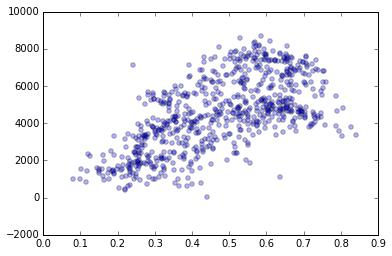

In [4]:
# Plot the data in a scatter plot
plt.scatter(bike_dat.atemp, bike_dat.cnt, alpha=0.3)  # Plot the raw data

In [5]:
# Estimate the model parameters
est_s = smf.ols(formula='cnt ~ temp', data=bike_dat).fit()

# View the model estimates
est_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sun, 20 Sep 2015   Prob (F-statistic):           2.81e-81
Time:                        16:12:10   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.000       898.242  1531.042
temp        6640.7100    305.188     21.759      0.000      6041.558  7239.862
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

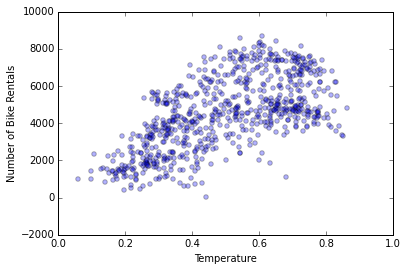

In [6]:
# Plot the data with scatter plot
plt.scatter(bike_dat.temp, bike_dat.cnt, alpha=0.3) 
plt.xlabel("Temperature")
plt.ylabel("Number of Bike Rentals")

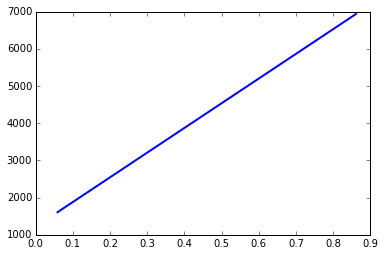

In [7]:
# Generate coefficient estimates 
plt.plot([bike_dat.temp.min(), bike_dat.temp.max()],
        [est_s.params.Intercept + est_s.params.temp * bike_dat.temp.min(),
           est_s.params.Intercept + est_s.params.temp * bike_dat.temp.max()],
            linewidth=2)      

In [8]:
# Generate data points
x_prime = pd.DataFrame({'temp' : np.linspace(bike_dat.temp.min(), 
                                           bike_dat.temp.max(), 100)})

In [9]:
# Generate the predictions using the built in method
y_hat = est_s.predict(x_prime)

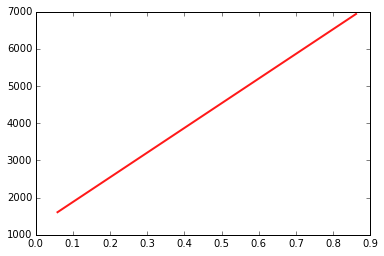

In [10]:
# Plot the data
plt.plot(x_prime, y_hat, 'r', linewidth=2, alpha=0.9)


In [11]:
# Now let's run a multiple linear regression
# The temp variable is no longer significant. Why? Multicollinearity
est_m = smf.ols(formula='cnt ~ atemp + temp + workingday + windspeed', 
                data=bike_dat).fit()
est_m.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 20 Sep 2015   Prob (F-statistic):           4.90e-83
Time:                        16:12:10   Log-Likelihood:                -6373.8
No. Observations:                 731   AIC:                         1.276e+04
Df Residuals:                     726   BIC:                         1.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1730.6195    273.332      6.332      0.000      1194.005  2267.234
atemp       3793.9180   2686.562      1.412      0.158     -1480.439  9068.275
temp        3059.3297   2381.011      1.285      0.199     -1615.158  7733.818
workingday   111.7598    118.383      0.944      0.345      -120.654   344.174
windspeed  -3243.9056    735.550     -4.410      0.000     -4687.964 -1799.848
==============================================================================
Omnibus:                       22.277   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.884
Skew:                           0.191   Prob(JB):                     0.000967
Kurtosis:                       2.443   Cond. No.                         93.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa42eebcbe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa42e1a9240>]], dtype=object)

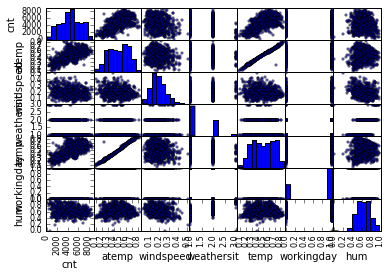

In [12]:
# Scatter plot (observe the (unsurprising) correlation between atemp and temp)
cols = ['cnt','atemp','windspeed','weathersit','temp','workingday','hum']
pd.scatter_matrix(bike_dat[cols])

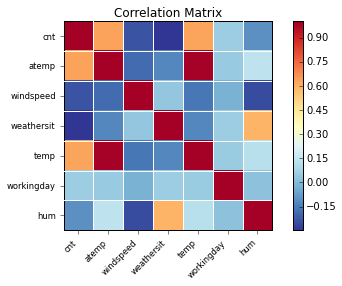

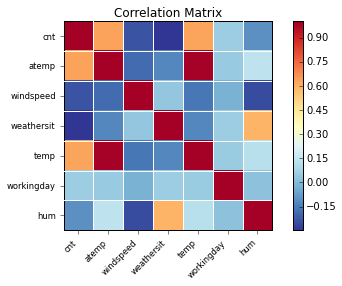

In [13]:
# Correlation coefficient matrix
corr_matrix = np.corrcoef(bike_dat[cols].T)
sm.graphics.plot_corr(corr_matrix, xnames=cols)


In [14]:
# Let's say we wanted to include an interaction term
# We would do this by including the ':' between interacting variables
est_m = smf.ols(formula='cnt ~ temp + windspeed + temp:windspeed + workingday', 
                data=bike_dat).fit()

est_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 20 Sep 2015   Prob (F-statistic):           1.06e-82
Time:                        16:12:15   Log-Likelihood:                -6374.6
No. Observations:                 731   AIC:                         1.276e+04
Df Residuals:                     726   BIC:                         1.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2170.3373    446.421      4.862      0.000      1293.908  3046.767
temp            5856.7056    868.125      6.746      0.000      4152.371  7561.040
windspeed      -4777.8634   2112.043     -2.262      0.024     -8924.304  -631.423
temp:windspeed  2915.9780   4410.188      0.661      0.509     -5742.266  1.16e+04
workingday       108.4323    118.590      0.914      0.361      -124.387   341.252
==============================================================================
Omnibus:                       24.162   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.988
Skew:                           0.205   Prob(JB):                     0.000556
Kurtosis:                       2.431   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# An alternate way of specifying interaction terms
# a*b is equivalent to a + b + a:b
est_m = smf.ols(formula='cnt ~ temp*windspeed + workingday',data=bike_dat).fit()

est_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 20 Sep 2015   Prob (F-statistic):           1.06e-82
Time:                        16:12:15   Log-Likelihood:                -6374.6
No. Observations:                 731   AIC:                         1.276e+04
Df Residuals:                     726   BIC:                         1.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2170.3373    446.421      4.862      0.000      1293.908  3046.767
temp            5856.7056    868.125      6.746      0.000      4152.371  7561.040
windspeed      -4777.8634   2112.043     -2.262      0.024     -8924.304  -631.423
temp:windspeed  2915.9780   4410.188      0.661      0.509     -5742.266  1.16e+04
workingday       108.4323    118.590      0.914      0.361      -124.387   341.252
==============================================================================
Omnibus:                       24.162   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.988
Skew:                           0.205   Prob(JB):                     0.000556
Kurtosis:                       2.431   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Working with Hours.csv

* Read in the 'hour.csv' file
* Run the regression with: cnt ~ temp + hum + workingday + hour + C(weathersit)
* Evaluate the results, how does this compare with the day 
* Create a binary variable for rush hour defined by 6-9a & 4-6p
* Run the regression again. Does this new variable improve the results?

In [16]:
# Dataset: How many people rent capitol bikeshare bikes
bike_hour_dat = pd.read_csv("Data/hour.csv")
bike_hour_dat.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40


In [19]:
# Multiple regression 
est_hour_m = smf.ols(formula='cnt ~ temp + hum + workingday + hr + weathersit', data=bike_hour_dat).fit()
est_hour_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1675.
Date:                Sun, 20 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:17:28   Log-Likelihood:            -1.1162e+05
No. Observations:               17379   AIC:                         2.233e+05
Df Residuals:                   17373   BIC:                         2.233e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     67.1423      5.906     11.368      0.000        55.565    78.719
temp         328.1459      5.968     54.981      0.000       316.447   339.844
hum         -201.8075      6.751    -29.893      0.000      -215.040  -188.575
workingday     5.5447      2.436      2.277      0.023         0.771    10.319
hr             7.5163      0.173     43.526      0.000         7.178     7.855
weathersit    -3.3384      1.969     -1.695      0.090        -7.198     0.521
==============================================================================
Omnibus:                     4314.376   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10058.533
Skew:                           1.399   Prob(JB):                         0.00
Kurtosis:                       5.462   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
est_hour_m.rsquared_adj

0.32513605226217213

In [28]:
est_m.rsquared_adj

0.41039596797977484

* Add new variable rush hour

In [34]:
bike_hour_dat['rush']=0
bike_hour_dat['rush'][((bike_hour_dat['hr'] >= 6) & (bike_hour_dat['hr'] <= 9 ))|
            ((bike_hour_dat['hr'] >= 16) & (bike_hour_dat['hr'] <= 18 ))] = 1

/opt/Tools/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
est_hour_with_rush_m = smf.ols(formula='cnt ~ temp + hum + workingday + weathersit + rush', data=bike_hour_dat).fit()
est_hour_with_rush_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2256.
Date:                Sun, 20 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:37:32   Log-Likelihood:            -1.1069e+05
No. Observations:               17379   AIC:                         2.214e+05
Df Residuals:                   17373   BIC:                         2.214e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    132.2514      5.114     25.860      0.000       122.227   142.276
temp         364.6779      5.607     65.038      0.000       353.687   375.668
hum         -283.0456      6.117    -46.269      0.000      -295.036  -271.055
workingday     4.9341      2.309      2.137      0.033         0.409     9.460
weathersit     4.2917      1.854      2.315      0.021         0.658     7.925
rush         150.1824      2.355     63.781      0.000       145.567   154.798
==============================================================================
Omnibus:                     2365.140   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3903.017
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       4.389   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# print (est_hour_m.rsquared_adj)
# print (est_m.rsquared_adj)
# print (est_hour_with_rush_m.rsquared_adj)

0.325136052262
0.41039596798
0.467028835736


In [47]:
print ("Day                   :  [%0.6s]"%est_m.rsquared_adj)
print ("Hour                  :  [%0.6s]"%est_hour_m.rsquared_adj)
print ("Hour(With Rush hour)  :  [%0.6s]"%est_hour_with_rush_m.rsquared_adj)

Day                   :  [0.4103]
Hour                  :  [0.3251]
Hour(With Rush hour)  :  [0.3935]
